PREPARARTION FOR DATA ANALYTIC
- IMPORTING LIBRARY

In [3]:
import pandas as pd

LOADING DATASET FOR DATA ANALYTIC
- READING RAW DATASET
- LOAD DATASET OF STUDENT LIFESTYLE BASED ON CSV FILE

In [4]:
# Load CSV
df = pd.read_csv('D:/UNIVERSITY/UNIVERSITY/Data_Analytics_Analysis Gaya Hidup Mahasiswa - Pengaruhnya Terhadap IPK/student_lifestyle_dataset.csv')

DATA PRE-PROCESSING
- CLEANING RAW DATA FOR THE ANALYTIC
- MAKING SURE THE DATA IS CLEANED , CONSISTENT, AND FREE FROM FORMAT ERROR

In [5]:

# Drop / Remove duplicates Data
df = df.drop_duplicates()

# Drop / Remove rows with any missing values except stress_level
non_critical_columns = [col for col in df.columns if col.lower() != 'stress_level']
df = df.dropna(subset=non_critical_columns)

# Safe conversions data type  (if columns exist)
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

if 'numeric_column' in df.columns:
    df['numeric_column'] = pd.to_numeric(df['numeric_column'], errors='coerce')

# Strip whitespace from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Filter out invalid values
if 'age' in df.columns:
    df = df[df['age'] > 0]


DATA TRANSFORMATION 
- TRANFORMING DATA TO AN EASY USE FORMAT FOR THE ANALYTICS
- ENCODE THE DATA STRESS LEVEL COLUMN TO A NUMERIC FORMAT (EX. LOW :1 , MODERATE: 2, HIGH:3).


In [6]:

# Map stress_level to numeric, preserving all rows
if 'stress_level' in df.columns:
    df['stress_level'] = df['stress_level'].str.title()
    stress_mapping = {
        'Low': 1,
        'Moderate': 2,
        'High': 3
    }
    df['stress_level_numeric'] = df['stress_level'].map(stress_mapping)

EXPLORATORY DATA ANALYSIS
- LOOKING FOR PATTERN, OUTLIER, AND DISTRIBUTION
- LOOKING FOR VARIABLE RELATIONSHIPS

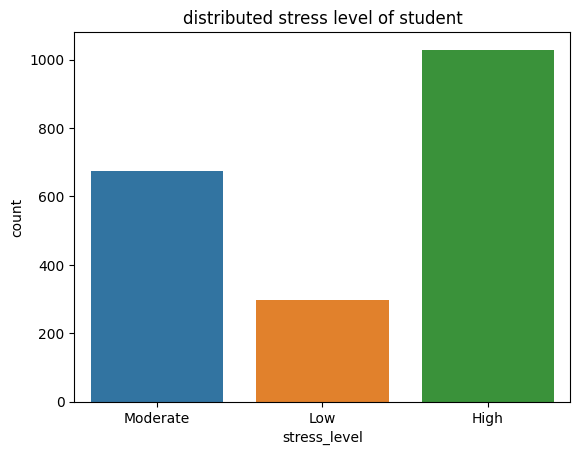

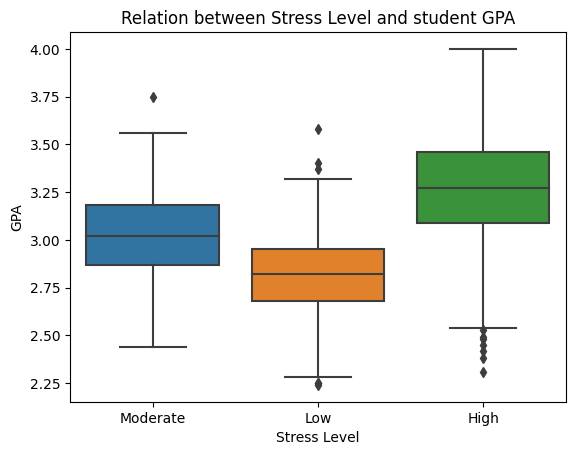

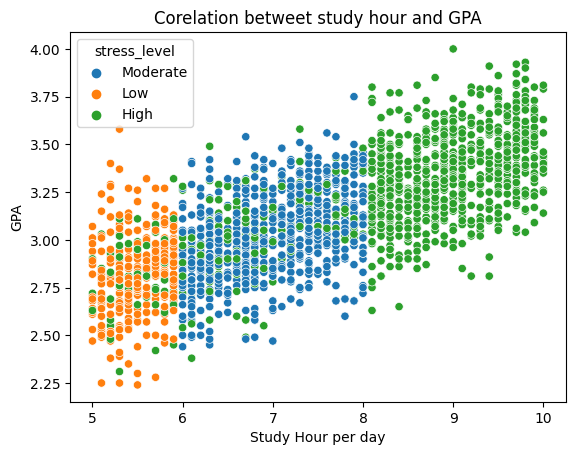

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


#visualizing the distributed stress level of student
sns.countplot(x='stress_level', data=df)
plt.title('distributed stress level of student')
plt.show()


#visualizing the GPA vs Stress Level
sns.boxplot(x='stress_level', y='gpa', data = df)
plt.title('Relation between Stress Level and student GPA')
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.show()


#visualizing  Study Hour vs GPA
sns.scatterplot(x='study_hours_per_day', y='gpa', hue='stress_level', data = df)
plt.title("Corelation betweet study hour and GPA")
plt.xlabel('Study Hour per day')
plt.ylabel('GPA')
plt.show()


CONCLUTION OF THE VISUALIZATION

The analysis shows that most students experience high stress levels, which are often linked to higher GPAs but also greater performance variation. The boxplot suggests that moderate to high stress can enhance academic performance when managed well, while excessive stress may cause burnout. The scatter plot confirms a positive correlation between study hours and GPA, indicating that consistent study habits improve results. However, too much stress without balance can reduce effectiveness. Overall, controlled stress and steady study routines are key to maintaining strong academic performance.


DATA EXPORTING / SAVING
- SAVING THE FINAL DATA TO A CSV DATA (EX. CLEANED_DATA.CSV)

In [28]:
# Final data
print(df.to_string())

# Save cleaned data
df.to_csv('cleaned_data.csv', index=False)

      student_id  study_hours_per_day  extracurricular_hours_per_day  sleep_hours_per_day  social_hours_per_day  physical_activity_hours_per_day   gpa stress_level  stress_level_numeric
0              1                  6.9                            3.8                  8.7                   2.8                              1.8  2.99     Moderate                     2
1              2                  5.3                            3.5                  8.0                   4.2                              3.0  2.75          Low                     1
2              3                  5.1                            3.9                  9.2                   1.2                              4.6  2.67          Low                     1
3              4                  6.5                            2.1                  7.2                   1.7                              6.5  2.88     Moderate                     2
4              5                  8.1                            0.6  